In [1]:
# Формула зависимости линейной регрессии: Y = aX + b. Задача найти a, b. Y - ценаб X - площадь

# Импортируем библиотеки и модули

import pandas as pd               # работа с табличными данными
import numpy as np                # облегчает математические операции
import matplotlib.pyplot as plt   # визуализация данных на графиках и диаграммах
from sklearn import linear_model  # содержит алгоритмы линейной регрессии

In [2]:
# Загружаем файл со входными данными в ту же дирректорию
# Загружаем файл в python-notebook

df = pd.read_excel('price1.xlsx')
df

,area,price
0,28,3.1
1,42,3.8
2,45,3.9
3,52,4.4
4,56,4.5
5,68,5.9
6,70,5.6
7,75,6.4
8,90,7.3


Text(0, 0.5, 'Цена млн. дол.')

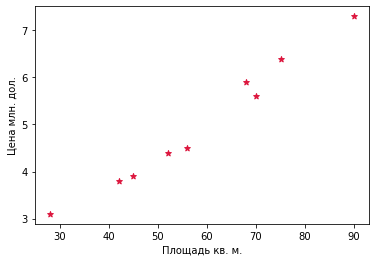

In [3]:
# Помещаем данные на график используя matplotlib

%matplotlib inline
plt.scatter(df.area, df.price, color='crimson', marker='*')  # df.area, df.price - что будет ось X и Y из таблицы выше
plt.xlabel('Площадь кв. м.')
plt.ylabel('Цена млн. дол.')

In [4]:
# Создаём переменную с моделью линейной регрессии

reg = linear_model.LinearRegression()  

In [5]:
# Тренеруем модель с помощью имеющихся данных
# Модель анализирует данные и ищет наилучшую формулу описывающую зависимость цены от площади

reg.fit(df[['area']], df.price)  # '[[]]' - факторы на основании чего искать, после запятой - ответы, предсказания
                                 # ФАКТОРОВ МОЖЕТ БЫТЬ НЕСКОЛЬКО!!!!!!!
               

LinearRegression()

In [6]:
# ПРЕДСКАЗЫВАЕМ РЕЗУЛЬТАТ

reg.predict([[120]])

array([9.38902671])

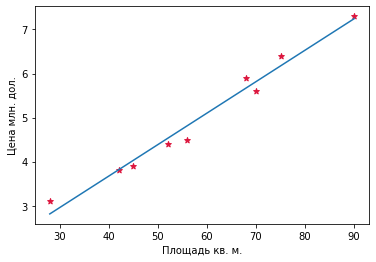

In [7]:
# Линия показывающая предсказания, наименьшие квадраты бла-бла-бла

%matplotlib inline
plt.scatter(df.area, df.price, color='crimson', marker='*')
plt.xlabel('Площадь кв. м.')
plt.ylabel('Цена млн. дол.')
plt.plot(df.area, reg.predict(df[['area']]))  # По оси X площадь, по оси Y - цены которые предсказала наша маодель !!!

# Будут отклонения от линии, но линия покажет результаты с наименьшей погрешностью

In [8]:
# После того как модель обучилась, мы может загрузить другие файлы для предсказания стоимости

In [9]:
# Заносим новый файл в python-notebook

pred = pd.read_excel('prediction_price.xlsx')
pred.head(3) # выводим первые 3 строки

,area
0,25
1,37
2,40


In [10]:
# Используем имеющуюся модель REG чтобы предсказать цены в новом файле

p = reg.predict(pred)
p

array([2.59820029, 3.45598889, 3.67043604, 4.95711894, 5.17156609,
       5.60046039, 5.95787231, 6.88714329, 7.67344951, 8.31679096,
       9.24606194])

In [11]:
# Создаём новую колонку в таблице выше, чтобы занести туда предсказанные данные

pred['predicted prices'] = p  # в таблице PRED создаём колонку PREDICTED PRICES и назначаем данные из результата "P"
pred

,area,predicted prices
0,25,2.598200
1,37,3.455989
2,40,3.670436
3,58,4.957119
4,61,5.171566
5,67,5.600460
6,72,5.957872
7,85,6.887143
8,96,7.673450
9,105,8.316791


In [12]:
# Сохраняем данные в EXCEL

pred.to_excel('new_predict.xlsx', index=False)  # index - нумерация в EXCEL-файле

In [13]:
reg.coef_ # Коэффицент "а" из формулы линейной регрессии в нашей модели

array([0.07148238])

In [14]:
reg.intercept_ # Коэффицент "b" из формулы линейной регрессии в нашей модели

0.8111407046647905

In [15]:
# стоимость квартиры = 0.07148238 * Площадь + 0.8111407046647905